# Overview #

The objective of this task is to build a model that predicts the type of wine (red or white).

# Import libraries & define some variables #

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

TRAIN_DATASET = os.path.join('dataset', 'winequality.csv')

# Data Inspection and Preprocessing #

In [2]:
data = pd.read_csv(TRAIN_DATASET)
df = data.copy()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.0,0.200,0.32,3.0,0.031,26.0,118.0,0.99134,3.38,0.68,11.2,7,white
1,9.2,0.430,0.49,2.4,0.086,23.0,116.0,0.99760,3.23,0.64,9.5,5,red
2,6.3,0.270,0.18,7.7,0.048,45.0,186.0,0.99620,3.23,0.47,9.0,5,white
3,8.6,0.485,0.29,4.1,0.026,19.0,101.0,0.99180,3.01,0.38,12.4,5,white
4,7.7,0.270,0.34,1.8,0.028,26.0,168.0,0.99110,2.99,0.48,12.1,7,white


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type                    6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


## One-Hot Encoding ##

`type` values will be one-hot encoded. `white` will be represented by 1 while `red` will be represented by 0.

In [4]:
type_map = {'white': 1, 'red': 0}
df['type'] = df['type'].map(type_map)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.0,0.200,0.32,3.0,0.031,26.0,118.0,0.99134,3.38,0.68,11.2,7,1
1,9.2,0.430,0.49,2.4,0.086,23.0,116.0,0.99760,3.23,0.64,9.5,5,0
2,6.3,0.270,0.18,7.7,0.048,45.0,186.0,0.99620,3.23,0.47,9.0,5,1
3,8.6,0.485,0.29,4.1,0.026,19.0,101.0,0.99180,3.01,0.38,12.4,5,1
4,7.7,0.270,0.34,1.8,0.028,26.0,168.0,0.99110,2.99,0.48,12.1,7,1


# Exploratory Data Analysis #

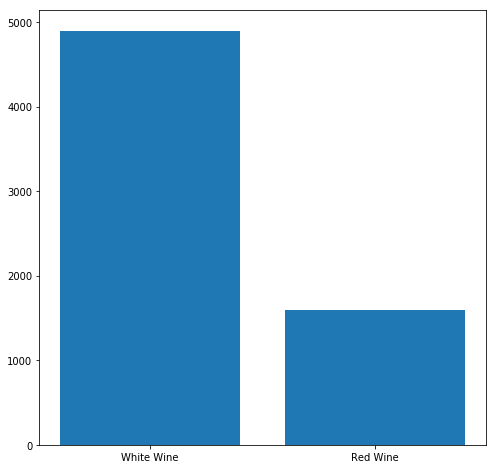

In [5]:
white_wine = np.array(df[df['type'] == 1])
red_wine = np.array(df[df['type'] == 0])

plt.figure(figsize=(8, 8))
plt.bar(x=[1, 2], height=[white_wine.shape[0], red_wine.shape[0]], tick_label=['White Wine', 'Red Wine'])
plt.show()

Most of the wine in the dataset are white. This is important when dividing the dataset into training and testing sets.

Studying the correlation between the features will give an idea of what features really affect wine quality positively or negatively.

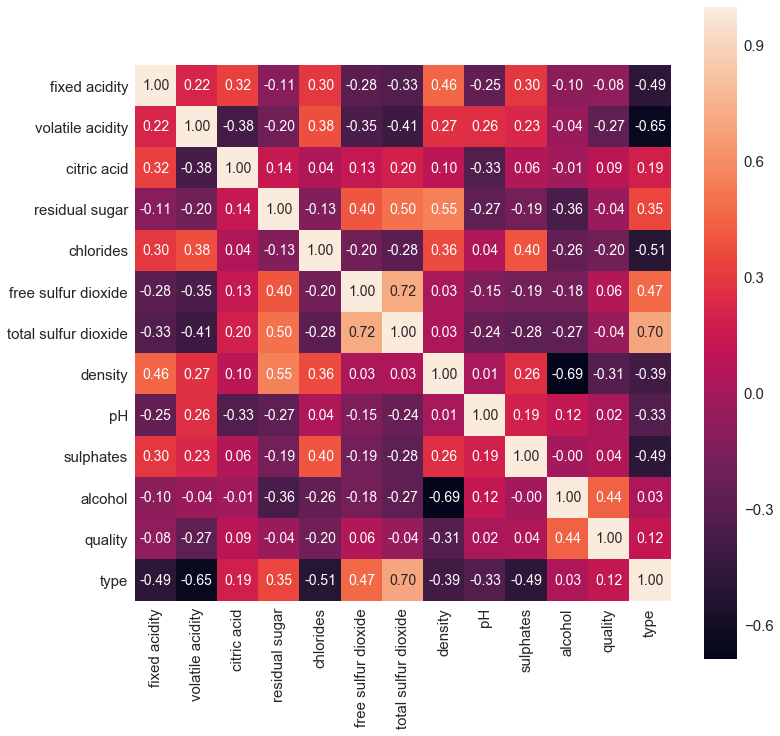

In [6]:
def heatmap(df):
    plt.figure(figsize=(12, 12))
    sns.set(font_scale=1.5)
    sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 14}, yticklabels=df.columns, 
                xticklabels=df.columns)
    plt.show()
    
heatmap(df)

We will exam features with strong correlation (>=0.45) between them.

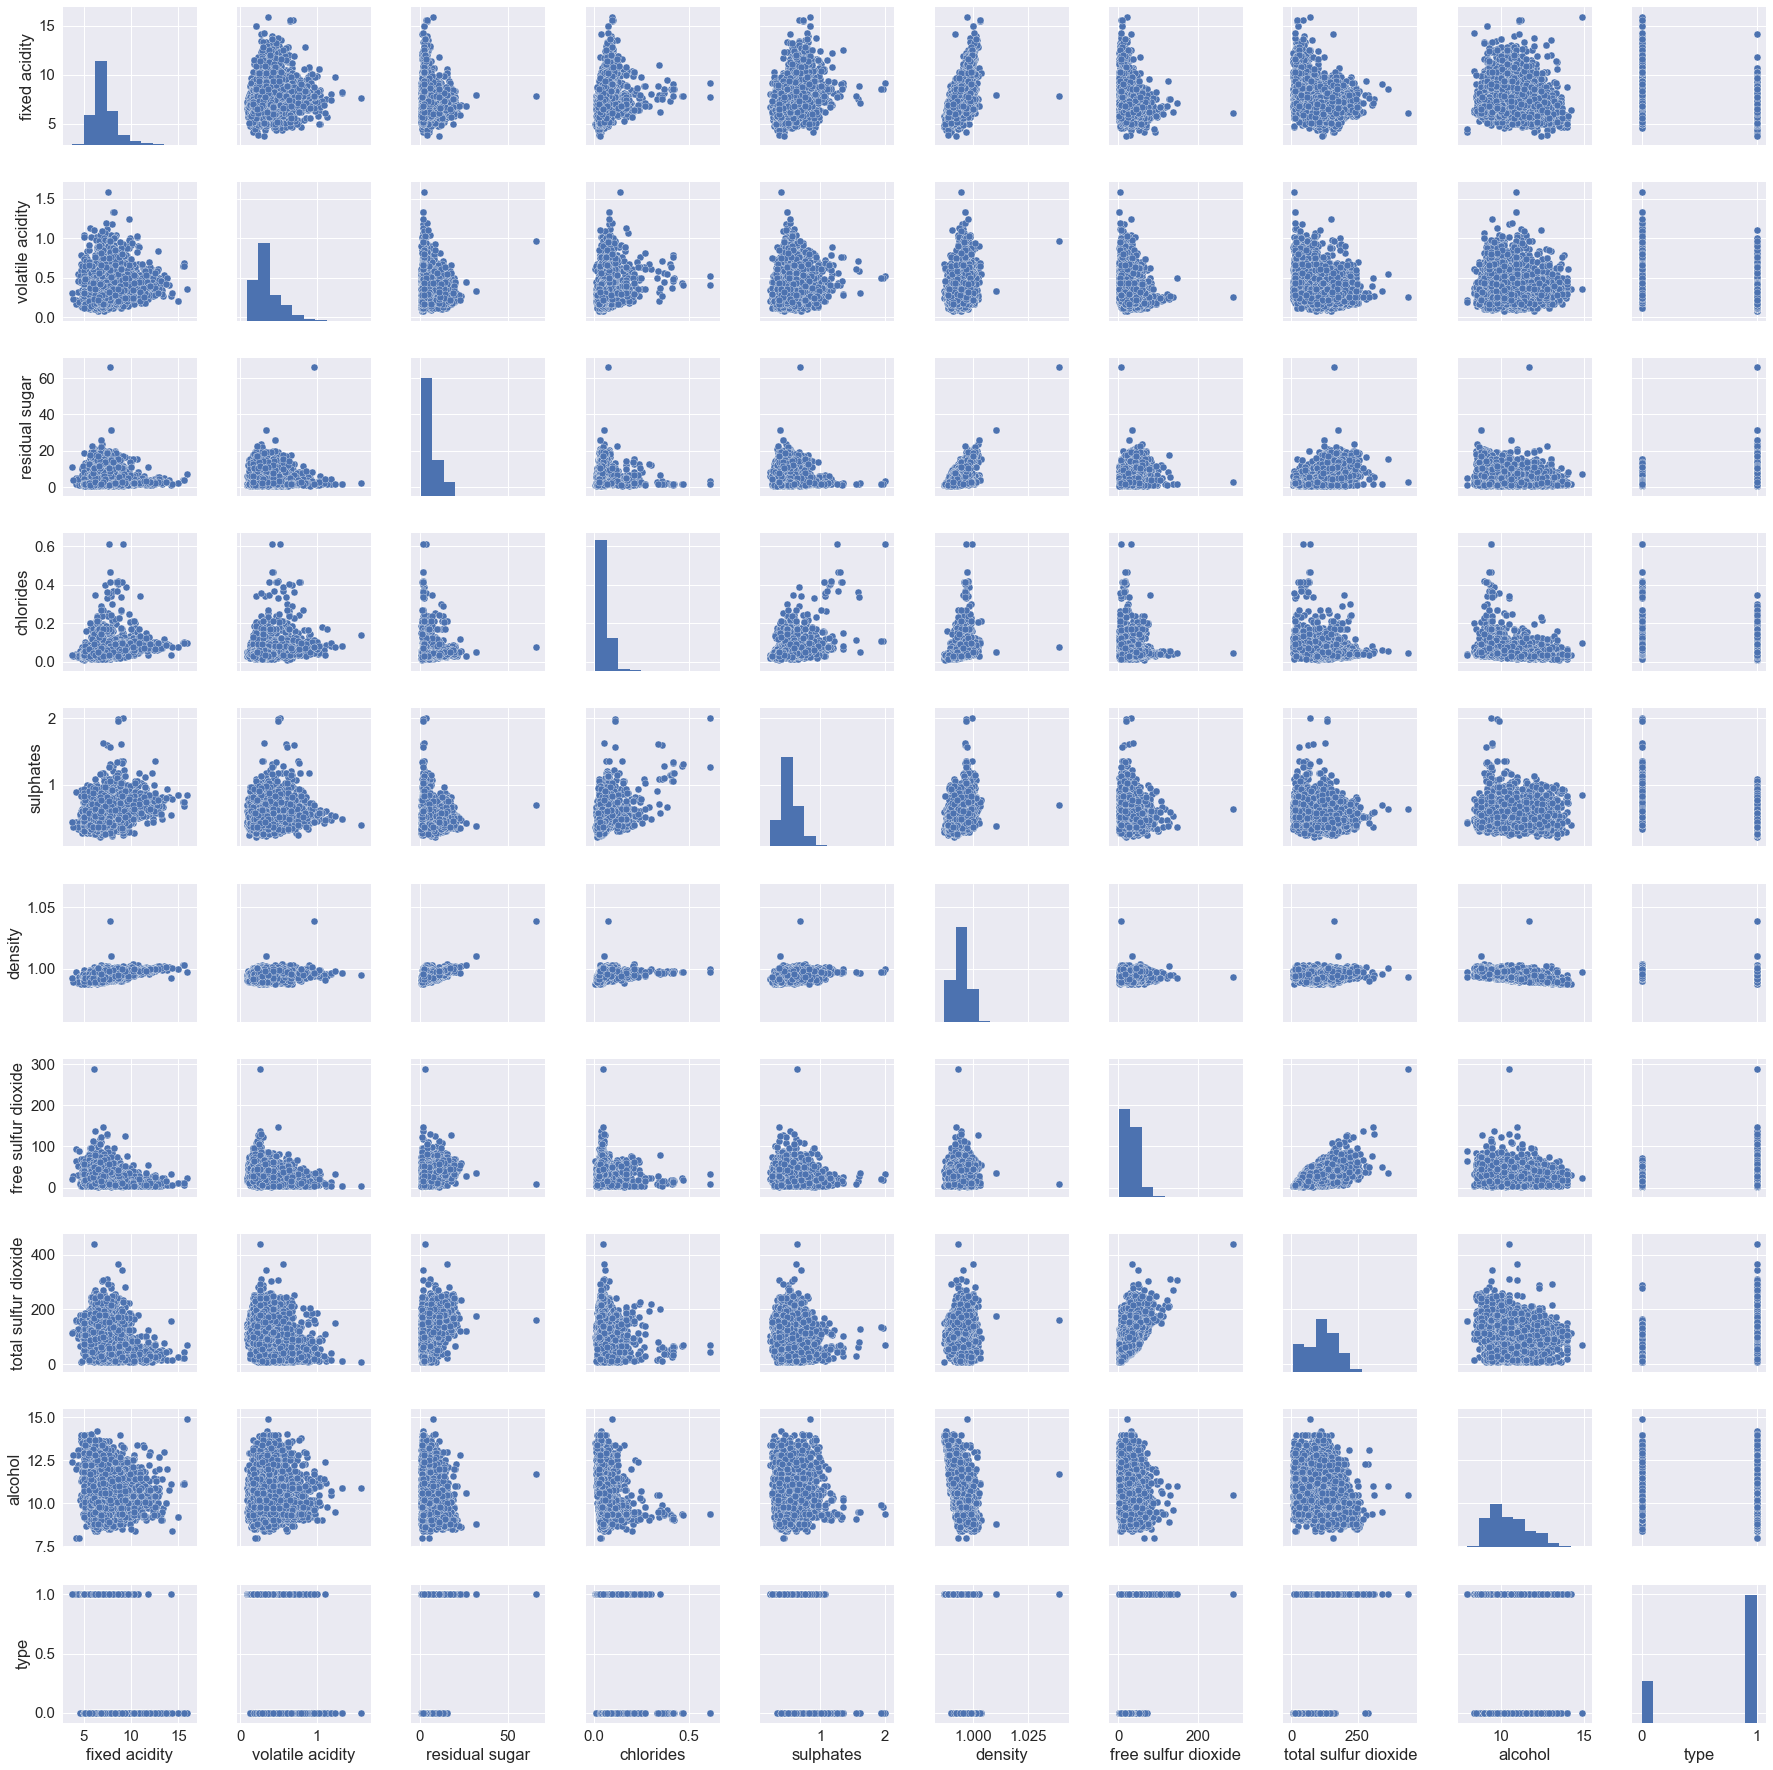

In [7]:
corr_cols = ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'sulphates', 'density', 
             'free sulfur dioxide', 'total sulfur dioxide', 'alcohol', 'type']

def pairplot(cols):
    sns.pairplot(df[cols])
    plt.show()
    
pairplot(corr_cols)

# Looking out for outliers #

The approach to be applied to looking for outliers will be to compare correlations between features and view the plot of points between these correlations. Correlation values greater than 0.45 and have "eye-balled" outliers from the pairplot will be analyzed.

In [8]:
from scipy import stats
from scipy.optimize import curve_fit
from numpy.polynomial.polynomial import polyfit
import random

def plot_relationship_best_fit(x_axis, x_label, y_axis, y_label, best_fit='linear'):
    fit = None
    
    if best_fit == 'linear':
        slope, intercept, r_value, p_value, std_err = stats.linregress(x_axis, y_axis)
        fit = slope * x_axis + intercept
    
    if best_fit == 'quadratic':
        popt, pcov = curve_fit(func, x_axis, y_axis)
        fit = func(x_axis, *popt)
        
    np.random.seed(42)
    r = random.randint(0, len(x_axis)-1)
    
    plt.figure(figsize=(8,8))    
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, fit, color='r')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    
def func(x, a, b, c):
    return a*(x**2) + b*x + c

In [9]:
def corr_plot(x_axis, x_label, y_axis, y_label, title=None, legend=None):
    plt.figure(figsize=(8, 8))
    plt.scatter(x_axis, y_axis)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

#### Fixed Acidity vs Density ####

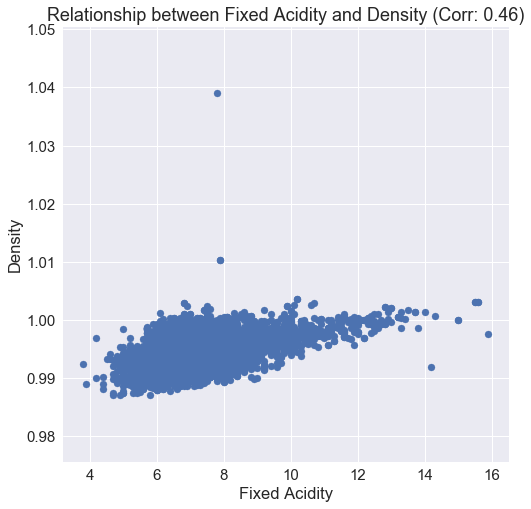

In [10]:
corr = 'Corr: %.2f' % df['fixed acidity'].corr(df['density'])
corr_plot(df['fixed acidity'], 'Fixed Acidity', df['density'], 'Density', 
          'Relationship between Fixed Acidity and Density ({})'.format(corr))

Densities greater than 1.01 will be removed from the dataset.

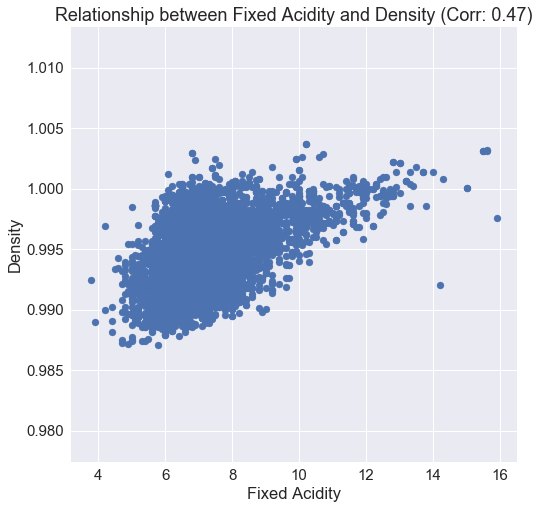

In [11]:
df = df[df['density'] < 1.01]

corr = 'Corr: %.2f' % df['fixed acidity'].corr(df['density'])
corr_plot(df['fixed acidity'], 'Fixed Acidity', df['density'], 'Density', 
          'Relationship between Fixed Acidity and Density ({})'.format(corr))

#### Residual Sugar vs Total Sulfur Dioxide ####

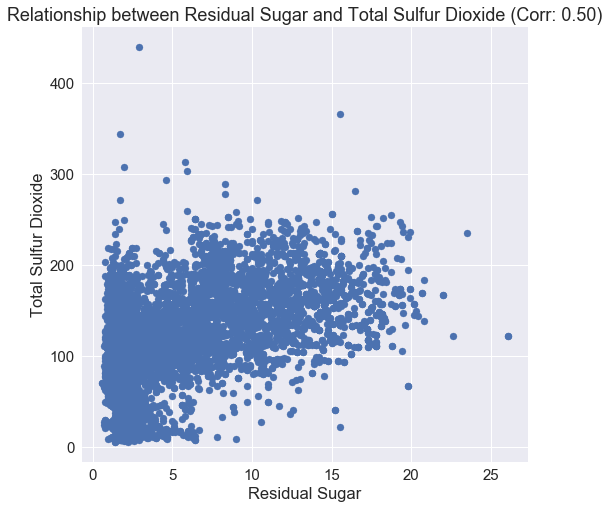

In [12]:
corr = 'Corr: %.2f' % df['residual sugar'].corr(df['total sulfur dioxide'])
corr_plot(df['residual sugar'], 'Residual Sugar', df['total sulfur dioxide'], 'Total Sulfur Dioxide', 
          'Relationship between Residual Sugar and Total Sulfur Dioxide ({})'.format(corr))

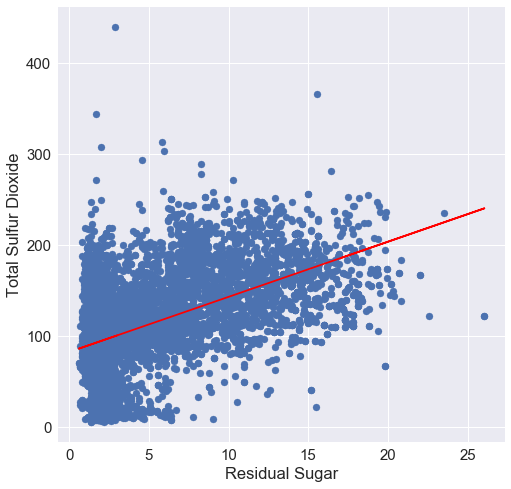

In [13]:
plot_relationship_best_fit(df['residual sugar'], 'Residual Sugar', df['total sulfur dioxide'], 'Total Sulfur Dioxide')

Total sulfur dioxide greater than 300 and residual sugar greater than 22 will be removed.

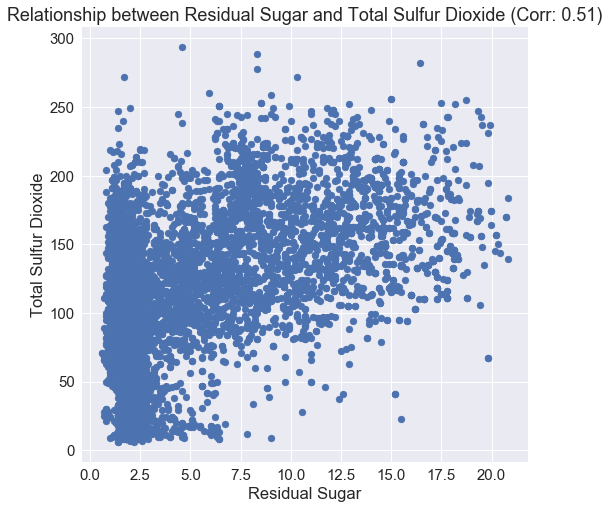

In [14]:
df = df[df['total sulfur dioxide'] < 300]
df = df[df['residual sugar'] < 22]

corr = 'Corr: %.2f' % df['residual sugar'].corr(df['total sulfur dioxide'])
corr_plot(df['residual sugar'], 'Residual Sugar', df['total sulfur dioxide'], 'Total Sulfur Dioxide', 
          'Relationship between Residual Sugar and Total Sulfur Dioxide ({})'.format(corr))

#### Residual Sugar vs Density ####

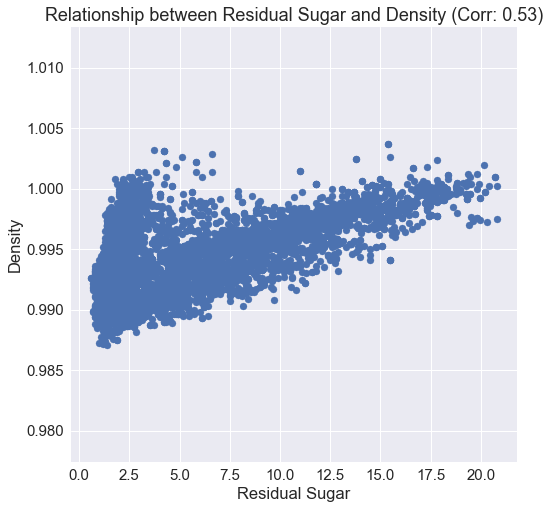

In [15]:
corr = 'Corr: %.2f' % df['residual sugar'].corr(df['density'])
corr_plot(df['residual sugar'], 'Residual Sugar', df['density'], 'Density', 
          'Relationship between Residual Sugar and Density ({})'.format(corr))

#### Free Sulfur Dioxide & Total Sulfur Dioxide ####

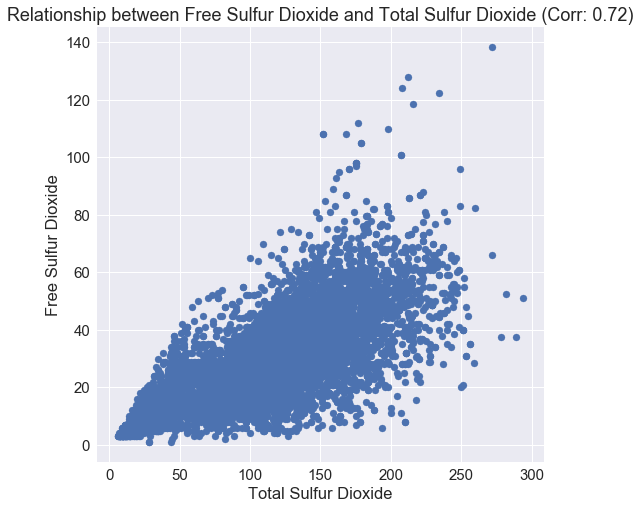

In [16]:
corr = 'Corr: %.2f' % df['free sulfur dioxide'].corr(df['total sulfur dioxide'])
corr_plot(df['total sulfur dioxide'], 'Total Sulfur Dioxide', df['free sulfur dioxide'], 'Free Sulfur Dioxide', 
          'Relationship between Free Sulfur Dioxide and Total Sulfur Dioxide ({})'.format(corr))

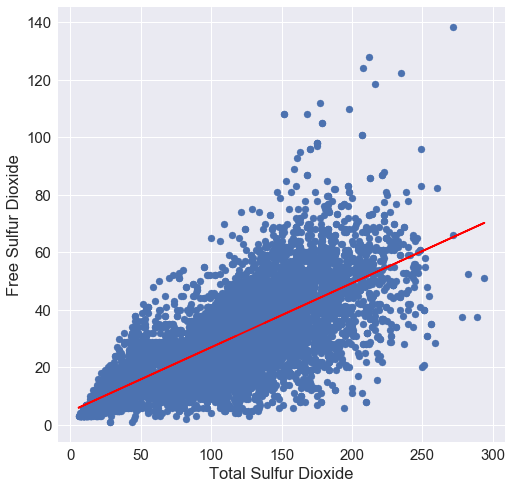

In [17]:
plot_relationship_best_fit(df['total sulfur dioxide'], 'Total Sulfur Dioxide', df['free sulfur dioxide'], 
                           'Free Sulfur Dioxide')

Free sulfur dioxide greater than 100 will be removed.

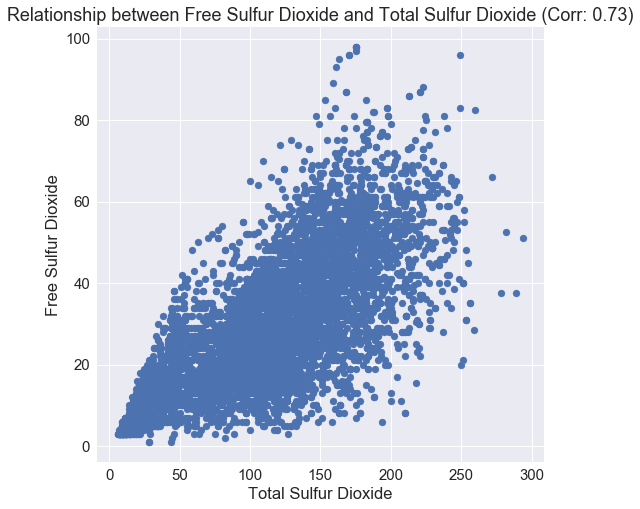

In [18]:
df = df[df['free sulfur dioxide'] < 100]

corr = 'Corr: %.2f' % df['free sulfur dioxide'].corr(df['total sulfur dioxide'])
corr_plot(df['total sulfur dioxide'], 'Total Sulfur Dioxide', df['free sulfur dioxide'], 'Free Sulfur Dioxide', 
          'Relationship between Free Sulfur Dioxide and Total Sulfur Dioxide ({})'.format(corr))

#### Density vs Alcohol ####

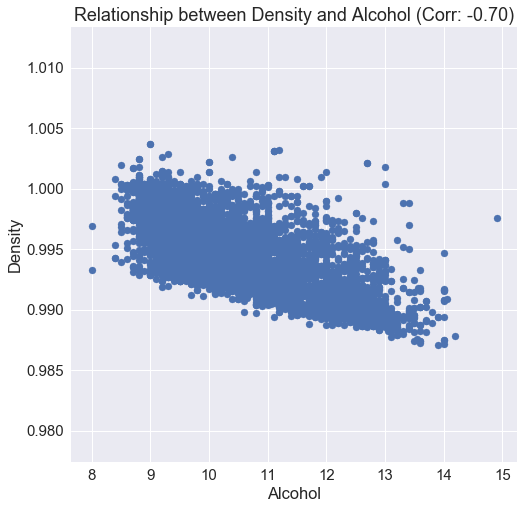

In [19]:
corr = 'Corr: %.2f' % df['density'].corr(df['alcohol'])
corr_plot(df['alcohol'], 'Alcohol', df['density'], 'Density', 
          'Relationship between Density and Alcohol ({})'.format(corr))

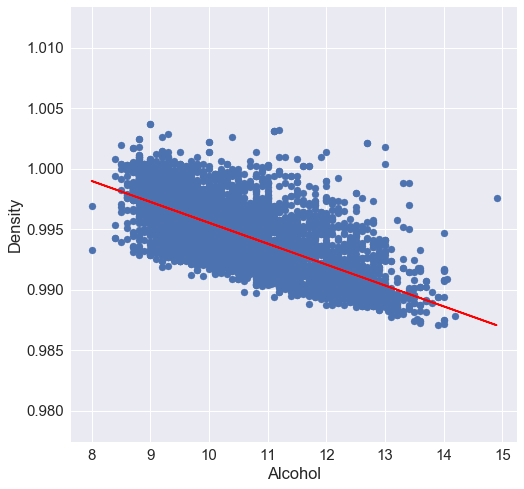

In [20]:
plot_relationship_best_fit(df['alcohol'], 'Alcohol', df['density'], 'Density')

Alcohol greater than 14.5 will be excluded.

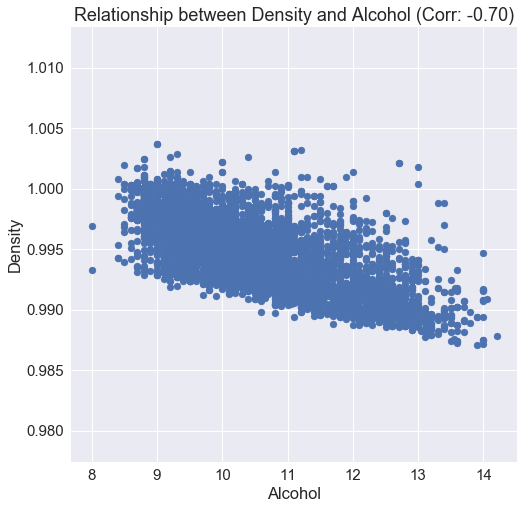

In [21]:
df = df[df['alcohol'] < 14.5]

corr = 'Corr: %.2f' % df['density'].corr(df['alcohol'])
corr_plot(df['alcohol'], 'Alcohol', df['density'], 'Density', 
          'Relationship between Density and Alcohol ({})'.format(corr))

In [22]:
df.shape

(6467, 13)

# Feature Engineering #

Features will be engineered to create new features based on the relationship between the features and their correlation. From research, total acidity is made up of fixed acidity and volatile acidity. These features will be combined to one feature. Features that have a correlation greater than 0.4 will be combined to form new features.

In [23]:
df['total acidity'] = df['fixed acidity'] + df['volatile acidity']
df['fixed acidity density'] = df ['fixed acidity'] * df['density']
df['fixed acidity type'] = df['fixed acidity'] * df['type']
df['volatile acidity total sulfur dioxide'] = df['volatile acidity']  * df['total sulfur dioxide']
df['volatile acidity type'] = df['volatile acidity'] * df['type']
df['residual sugar free sulfur dioxide'] = df['residual sugar'] * df['free sulfur dioxide']
df['residual sugar total sulfur dioxide'] = df['residual sugar'] * df['total sulfur dioxide']
df['residual sugar density'] = df['residual sugar'] * df['density']
df['chlorides sulphates'] = df['chlorides'] * df['sulphates']
df['chlorides type'] = df['chlorides'] * df['type']
df['free sulfur dioxide total sulfur dioxide'] = df['free sulfur dioxide'] * df['total sulfur dioxide']
df['free sulfur dioxide type'] = df['free sulfur dioxide'] * df['type']
df['total sulfur dioxide type'] = df['total sulfur dioxide'] * df['type']
df['alcohol density'] = df['density'] * df['alcohol']
df['sulphates type'] = df['sulphates'] * df['type']
df['alcohol quality'] = df['alcohol'] * df['quality']

df.drop(['fixed acidity', 'volatile acidity', 'density', 'total sulfur dioxide', 'free sulfur dioxide', 
         'alcohol', 'residual sugar', 'chlorides', 'sulphates'], axis=1, inplace=True)
df = df.reset_index(drop=True)

df.shape

(6467, 20)

In [24]:
random_state = 42
target = df['type']
features = df.drop('type', axis=1)
features.shape

(6467, 19)

# Feature Scaling #

With outliers removed, the dataset will be scaled using the `StandardScaler` class. But first the data will be split into training and testing sets with a ration of 70% to 30%.

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=random_state, 
                                                    stratify=target)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4526, 19)
(1941, 19)
(4526,)
(1941,)


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model #

The model will be trained on the default hyperparameters of `LogisticRegression`, `DecisionTreeClassifier`, `RandomForestClassifier`, `GradientBoostingClassifier`, `Support Vector Machine`, `Naives Bayes` and `Nearest Neighbor`.

The performance of the model will be evaluated using its `accuracy`.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, shuffle=True, random_state=random_state)

def experimentation_scores(scores):
    return scores.mean()

c:\program files\python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Logistic Regression ##

In [28]:
model = LogisticRegression(random_state=random_state)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
lr = experimentation_scores(scores)

## Decision Tree Classifier ##

In [29]:
model = DecisionTreeClassifier(random_state=random_state)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
dtc = experimentation_scores(scores)

## Random Forest Classifier ##

In [30]:
model = RandomForestClassifier(random_state=random_state)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
rfc = experimentation_scores(scores)

## Gradient Boosting Classifier ##

In [31]:
model = GradientBoostingClassifier(random_state=random_state)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
gbc = experimentation_scores(scores)

## Supervised Vector Machine ##

In [32]:
model = SVC(random_state=random_state)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
svc = experimentation_scores(scores)

## Naive Bayes Classifier ##

In [33]:
model = GaussianNB()
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
gnb = experimentation_scores(scores)

## Nearest Neighbour ##

In [34]:
model = KNeighborsClassifier()
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
knc = experimentation_scores(scores)

Performane plot on default hyperparameters.

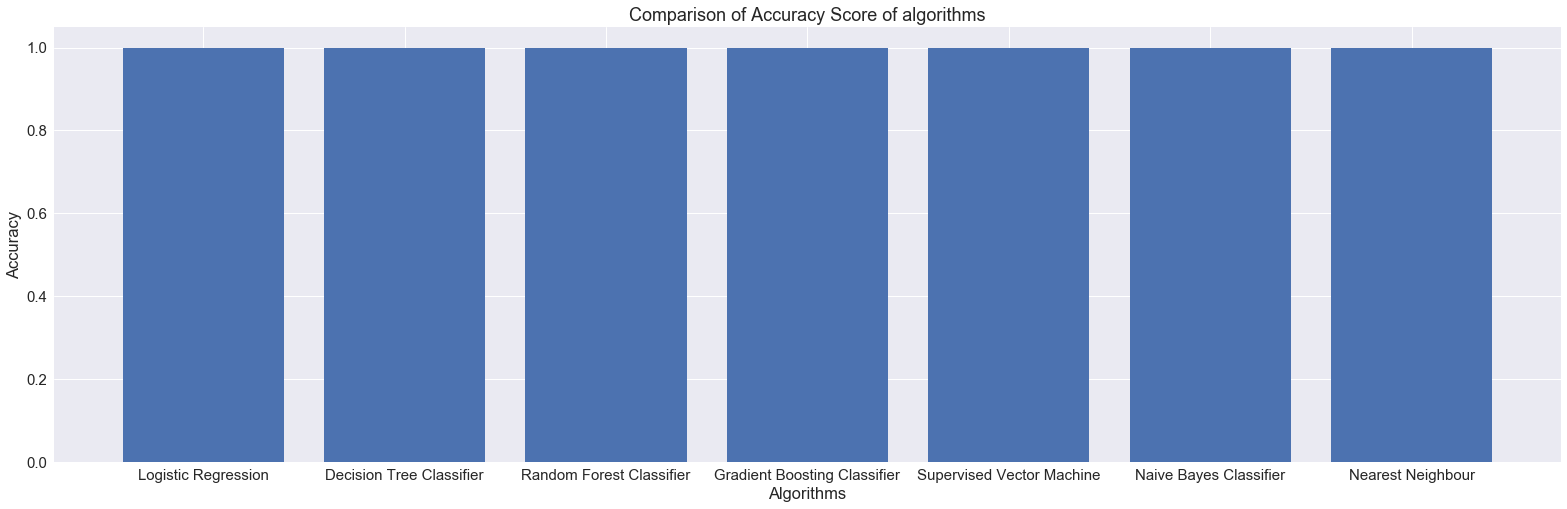

In [35]:
x = np.arange(7)
plt.figure(figsize=(27, 8))
plt.bar(x, [lr, dtc, rfc, gbc, svc, gnb, knc])
plt.xticks(x, ('Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 
               'Supervised Vector Machine', 'Naive Bayes Classifier', 'Nearest Neighbour'))
plt.title('Comparison of Accuracy Score of algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.show()

All the classifiers perform at a 100% accuracy on the training dataset using default hyperparameters. `LogisticRegression` will be used to train the model.

# Train the model #

In [36]:
model = LogisticRegression(random_state=random_state)

A learning curve is plotted to see how well the model learns the dataset without overfitting and underfitting.

In [37]:
from sklearn.model_selection import learning_curve

scoring = 'accuracy'
n_jobs = -1
train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, cv=cv, 
                                                         scoring=scoring, n_jobs=n_jobs, verbose=1)
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

[learning_curve] Training set sizes: [ 407 1323 2240 3156 4073]


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.7s finished


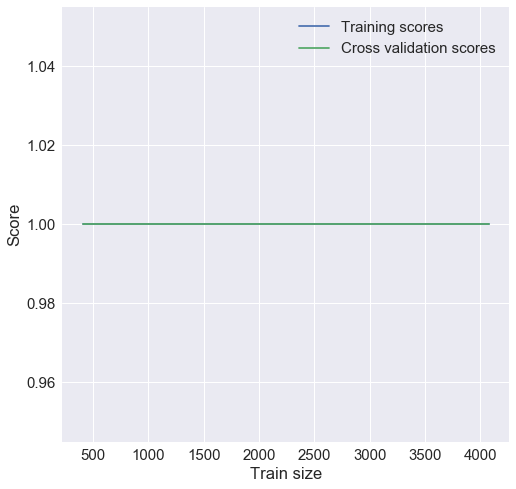

In [38]:
plt.figure(figsize=(8, 8))
plt.plot(train_sizes, train_scores_mean, label='Training scores')
plt.plot(train_sizes, val_scores_mean, label='Cross validation scores')
plt.xlabel('Train size')
plt.ylabel('Score')
plt.legend()
plt.show()

### Fit model and make predictions ###

In [39]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate the model #

In [40]:
score = model.score(X_test, y_test)
print('Score: %.3f' % score)

Score: 1.000


The plot below compares the predictions of the model with the corresponding ground-truth values.

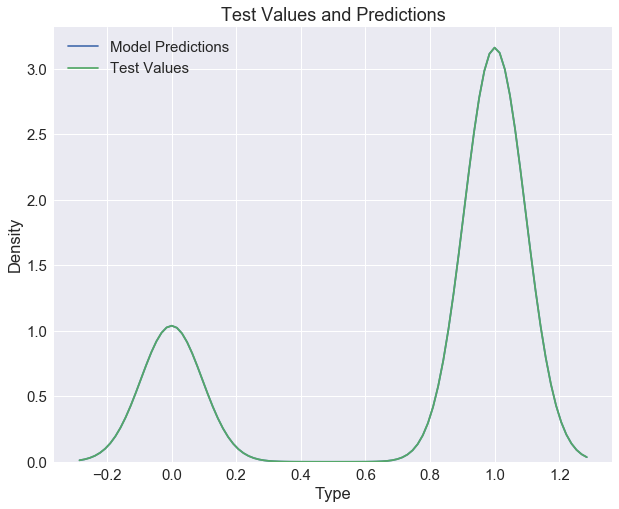

In [41]:
def evaluation_plot(y_test, predictions):
    plt.figure(figsize=(10, 8))

    # Density plot of the final predictions and the test values
    sns.kdeplot(predictions, label='Model Predictions')
    sns.kdeplot(y_test, label='Test Values')

    # Label the plot
    plt.xlabel('Type')
    plt.ylabel('Density')
    plt.title('Test Values and Predictions')
    plt.show()

evaluation_plot(y_test, predictions)